<a href="https://colab.research.google.com/github/lawalAfeez820/Deep-learning/blob/main/tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,ELU,ReLU
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,confusion_matrix,accuracy_score
import numpy as np
import matplotlib.pyplot as plt




# New Section

In [ ]:
# loading and reading the dataset
df_target=pd.read_csv("/content/tree_class_target.csv")
df_feature=pd.read_csv("/content/tree_class_feats.csv")

In [ ]:
df_feature.head()

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10
0,1.722029,-4.689223,-0.207066,2.498555,2.883010,1.579690,-2.720014,-1.246192,1.168185,1.400007
1,0.236202,-2.412059,-2.977042,2.837931,4.201749,0.536090,0.266874,-1.308043,3.728172,-1.198629
2,0.592300,-3.678390,-0.282953,0.912839,1.055228,1.235441,-3.378884,-1.117221,-0.274793,0.098392
3,1.579346,-1.135482,0.734795,-3.840698,-0.362227,2.641352,-3.080336,-1.728918,-2.738785,-1.061155
4,-2.962439,1.754583,-1.145055,1.857364,0.989132,2.567482,2.058646,-7.009674,-2.108419,1.437935


In [ ]:
np.unique(df_target.values)

array([0, 1])

In [ ]:
#shape of the dataset
df_feature.shape

(10000, 10)

In [ ]:
#checking for null
df_feature.isnull().sum()

feature 1     0
feature 2     0
feature 3     0
feature 4     0
feature 5     0
feature 6     0
feature 7     0
feature 8     0
feature 9     0
feature 10    0
dtype: int64

In [ ]:
#spliting the data into train and testset

X_train,X_test,Y_train,Y_test=train_test_split(df_feature,df_target,test_size=0.2,stratify=df_target,random_state=0)

# It is a binary classification problem and the aim is to classify tree as either deciduous or coniferous base on the measurement given such as height,number of branches etc
1.The output 0 means the tree is coniferous species and the output 1 means it is deciduous.

2.Train a deep learning model of 2 hidden layers, the first hidden layer should have 10 nodes with tanh being the activation function.The second should be of 5 nodes with tanh activation function.

3.Sigmoid activation function will be applied to the output layer.

4.cross_binaryentropy for loss,SDG as optimizer,and accuracy as the metrics.

In [ ]:
# modelling

model=Sequential()
model.add(Dense(input_dim=X_train.shape[1],units=10,activation="tanh"))
model.add(Dense(units=5,activation="tanh"))
model.add(Dense(units=1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile the model

model.compile(metrics=["accuracy"],loss="binary_crossentropy",optimizer="sgd")

In [ ]:
#using the model to train the training datase

history=model.fit(X_train,Y_train,validation_split=0.2,batch_size=5,epochs=100,shuffle=False)

Epoch 1/100
1280/1280 [==============================] - 7s 3ms/step - loss: 0.4000 - accuracy: 0.8122 - val_loss: 0.3415 - val_accuracy: 0.8512
Epoch 2/100
1280/1280 [==============================] - 3s 3ms/step - loss: 0.3199 - accuracy: 0.8667 - val_loss: 0.3179 - val_accuracy: 0.8669
Epoch 3/100
1280/1280 [==============================] - 3s 2ms/step - loss: 0.2990 - accuracy: 0.8775 - val_loss: 0.3020 - val_accuracy: 0.8794
Epoch 4/100
1280/1280 [==============================] - 3s 3ms/step - loss: 0.2837 - accuracy: 0.8842 - val_loss: 0.2878 - val_accuracy: 0.8838
Epoch 5/100
1280/1280 [==============================] - 4s 3ms/step - loss: 0.2699 - accuracy: 0.8900 - val_loss: 0.2757 - val_accuracy: 0.8844
Epoch 6/100
1280/1280 [==============================] - 3s 2ms/step - loss: 0.2568 - accuracy: 0.8941 - val_loss: 0.2642 - val_accuracy: 0.8850
Epoch 7/100
1280/1280 [==============================] - 3s 3ms/step - loss: 0.2433 - accuracy: 0.9006 - val_loss: 0.2527 - val_ac

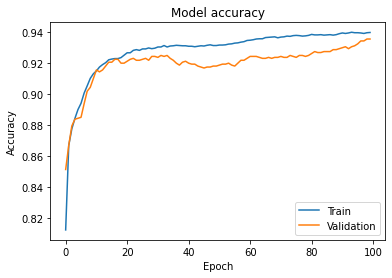

In [ ]:
#ploting the accuracy of the train and val data against epoch

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"])
plt.show()

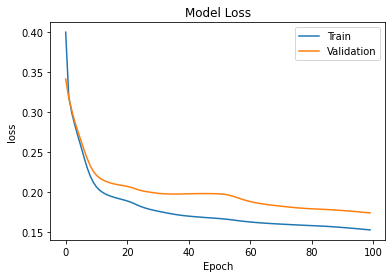

In [ ]:
#ploting the accuracy of the train and val data against epoch

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend(["Train","Validation"])
plt.show()

In [ ]:
#Testing the model 0on unseen data to see if it doesn't overfit

Y_pred=model.predict(X_test)
Y_pred=Y_pred>0.5
accuracy_score(Y_pred,Y_test)

0.9445

This is a great performance on the unseen data